In [1]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
from Data_import import data_frame
from ClusterNN import *
Data = data_frame()
reconstruct_losses = np.zeros((1,10))
for encoded_dim in [1,2,3,4,5,6,7,8,9,10]:#We suggest to set encodede_dim = 2, and 3 and 4, indepedently, insead of iteratively, because clusternn.train() contains random indexes used for model training.
    tf.set_random_seed(1)
    np.random.seed(1)
    random.seed(1)
    ae_nn = autoencoder_NN(encoded_dim = encoded_dim)
    reconstruct_loss = ae_nn.train(Data, BATCH_SIZE=1024, pre_train_steps = 20001)
    reconstruct_losses[0,encoded_dim-1] = reconstruct_loss
scio.savemat(f'reconstruct_losses_encoded_dims.mat',{'reconstruct_losses':reconstruct_losses})

D:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
D:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from pre_ae_ckpt\model_autoencoder_1.ckpt
encoded_dim = 1, reconstruct loss = 0.08574583381414413
INFO:tensorflow:Restoring parameters from pre_ae_ckpt\model_autoencoder_2.ckpt
encoded_dim = 2, reconstruct loss = 0.035426247864961624
INFO:tensorflow:Restoring parameters from pre_ae_ckpt\model_autoencoder_3.ckpt
encoded_dim = 3, reconstruct loss = 0.023267244920134544
INFO:tensorflow:Restoring parameters from pre_ae_ckpt\model_autoencoder_4.ckpt
encoded_dim = 4, reconstruct loss = 0.017323771491646767
INFO:tensorflow:Restoring parameters from pre_ae_ckpt\model_autoencoder_5.ckpt
encoded_dim = 5, reconstruct loss = 0.013939342461526394
INFO:tensorflow:Restoring parameters from pre_ae_ckpt\model_autoencoder_6.ckpt
encoded_dim = 6, reconstruct loss = 0.0141009371727705
INFO:tensorflow:Restoring parameters from pre_ae_ckpt\model_autoencoder_7.ckpt
encoded_dim = 7, reconstruct loss = 0.011774726212024689
INFO:tensorflow:Restoring parameters from pre_ae_ck

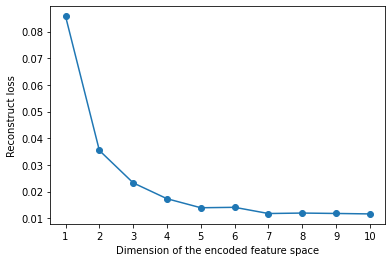

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),reconstruct_losses[0],'o-')
plt.xlabel('Dimension of the encoded feature space')
plt.ylabel('Reconstruct loss')
plt.xticks(range(1,11),np.arange(1,11,1))
plt.savefig('../figures/encoded_dims.png',dpi=600)